<a href="https://colab.research.google.com/github/victoriaportnaya/A_star/blob/master/Calculus_VP_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Additional Problem HW2**

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [2]:
# The functions
def f1(x):
    return 1 / (1 - x)**2

def f2(x):
    return np.sin(x)

def f3(x):
    return np.exp(-x**2)

In [3]:
# values for comparison
exact_f1 = -1  # ∫₀^{0.5} 1 / (1 - x)^2 dx = -1
exact_f2 = 2   # ∫₀^π sin(x) dx = 2
exact_f3 = 0.7468241328124271

In [4]:
functions = [
    {'func': f1, 'a': 0, 'b': 0.5, 'exact': exact_f1, 'name': '1 / (1 - x)^2'},
    {'func': f2, 'a': 0, 'b': np.pi, 'exact': exact_f2, 'name': 'sin(x)'},
    {'func': f3, 'a': 0, 'b': 1, 'exact': exact_f3, 'name': 'e^{-x^2}'},
]

# values to check
n_values = [10, 100, 1000, 10000, 100000, 1000000]

In [5]:
# Monte Carlo Integration
def monte_carlo_integration(f, a, b, n):
    x = np.random.uniform(a, b, n)
    fx = f(x)
    integral = (b - a) * np.mean(fx)
    return integral

In [6]:
# Midpoint Rule
def midpoint_rule(f, a, b, n):
    h = (b - a) / n
    x = a + (np.arange(n) + 0.5) * h
    fx = f(x)
    integral = h * np.sum(fx)
    return integral

In [7]:
# Trapezoidal Rule
def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    x = a + np.arange(n + 1) * h
    fx = f(x)
    integral = h * (0.5 * fx[0] + np.sum(fx[1:-1]) + 0.5 * fx[-1])
    return integral

In [8]:
# Simpson's Rule (n must be even)
def simpsons_rule(f, a, b, n):
    if n % 2 != 0:
        n += 1  # even n
    h = (b - a) / n
    x = a + np.arange(n + 1) * h
    fx = f(x)
    integral = h / 3 * (fx[0] + 2 * np.sum(fx[2:n:2]) + 4 * np.sum(fx[1:n:2]) + fx[n])
    return integral

In [9]:
# Higher-Order Newton-Cotes Formula
def boole_rule(f, a, b, n):
    if n % 4 != 0:
        n += 4 - (n % 4)  # n to be a multiple of 4
    h = (b - a) / n
    x = a + np.arange(n + 1) * h
    fx = f(x)

    coefficients = []
    for i in range(n + 1):
        if i == 0 or i == n:
            coefficients.append(7)
        elif i % 4 == 0:
            coefficients.append(14)
        elif i % 2 == 0:
            coefficients.append(12)
        else:
            coefficients.append(32)
    coefficients = np.array(coefficients)
    integral = 2 * h / 45 * np.dot(coefficients, fx)
    return integral



Integrating f(x) = 1 / (1 - x)^2 from 0 to 0.5
Exact value: -1

n = 10
  Method 1 (Monte Carlo):          1.0710744808401746 (Error: 2.0710744808401746, Time: 0.000153s)
  Method 2 (Midpoint Rule):        0.998547272583315 (Error: 1.9985472725833149, Time: 0.000064s)
  Method 3 (Trapezoidal Rule):     1.0029102549296525 (Error: 2.0029102549296525, Time: 0.000046s)
  Method 4 (Simpson's Rule):       1.000024939721438 (Error: 2.0000249397214382, Time: 0.000046s)
  Method 5 (Boole's Rule):         1.0000008462278775 (Error: 2.0000008462278775, Time: 0.000324s)

n = 100
  Method 1 (Monte Carlo):          0.9649764710346729 (Error: 1.9649764710346729, Time: 0.000157s)
  Method 2 (Midpoint Rule):        0.9999854172317251 (Error: 1.999985417231725, Time: 0.000064s)
  Method 3 (Trapezoidal Rule):     1.0000291660208807 (Error: 2.0000291660208807, Time: 0.000062s)
  Method 4 (Simpson's Rule):       1.000000002582389 (Error: 2.000000002582389, Time: 0.000061s)
  Method 5 (Boole's Rule):       

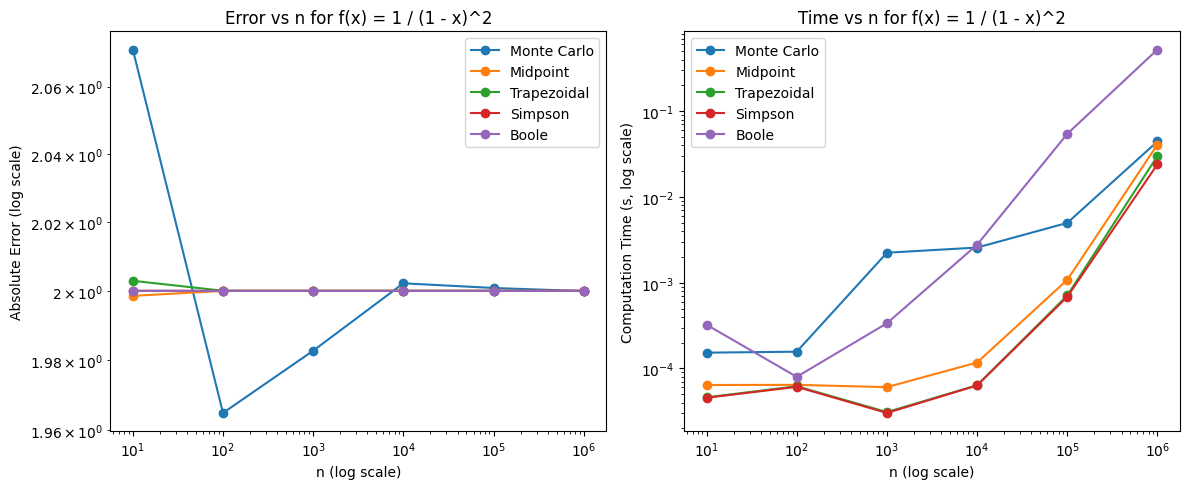


Integrating f(x) = sin(x) from 0 to 3.141592653589793
Exact value: 2

n = 10
  Method 1 (Monte Carlo):          2.6994346588242566 (Error: 0.6994346588242566, Time: 0.000144s)
  Method 2 (Midpoint Rule):        2.008248407907974 (Error: 0.008248407907974098, Time: 0.000068s)
  Method 3 (Trapezoidal Rule):     1.9835235375094546 (Error: 0.01647646249054535, Time: 0.000041s)
  Method 4 (Simpson's Rule):       2.0001095173150043 (Error: 0.00010951731500430384, Time: 0.000736s)
  Method 5 (Boole's Rule):         1.999998586652362 (Error: 1.413347638035134e-06, Time: 0.000101s)

n = 100
  Method 1 (Monte Carlo):          1.996087716032841 (Error: 0.003912283967159036, Time: 0.000117s)
  Method 2 (Midpoint Rule):        2.000082249070986 (Error: 8.224907098597356e-05, Time: 0.000052s)
  Method 3 (Trapezoidal Rule):     1.9998355038874436 (Error: 0.0001644961125564226, Time: 0.000065s)
  Method 4 (Simpson's Rule):       2.000000010824504 (Error: 1.0824503959838694e-08, Time: 0.000041s)
  Met

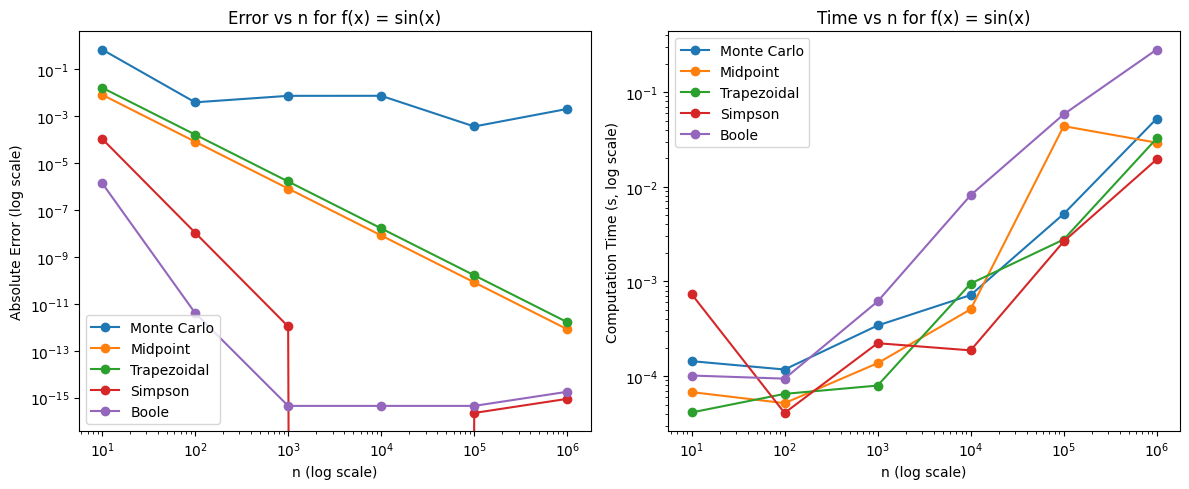


Integrating f(x) = e^{-x^2} from 0 to 1
Exact value: 0.7468241328124271

n = 10
  Method 1 (Monte Carlo):          0.8276614869458134 (Error: 0.08083735413338633, Time: 0.000143s)
  Method 2 (Midpoint Rule):        0.7471308777479975 (Error: 0.00030674493557036886, Time: 0.000066s)
  Method 3 (Trapezoidal Rule):     0.7462107961317495 (Error: 0.0006133366806776452, Time: 0.000040s)
  Method 4 (Simpson's Rule):       0.7468249482544436 (Error: 8.154420164663279e-07, Time: 0.000041s)
  Method 5 (Boole's Rule):         0.7468241353718509 (Error: 2.5594237840209644e-09, Time: 0.000051s)

n = 100
  Method 1 (Monte Carlo):          0.7237243122794754 (Error: 0.023099820532951676, Time: 0.000106s)
  Method 2 (Midpoint Rule):        0.7468271984923199 (Error: 3.0656798928330176e-06, Time: 0.000050s)
  Method 3 (Trapezoidal Rule):     0.7468180014679701 (Error: 6.131344457038779e-06, Time: 0.000038s)
  Method 4 (Simpson's Rule):       0.7468241328941763 (Error: 8.174916299452661e-11, Time: 0.0

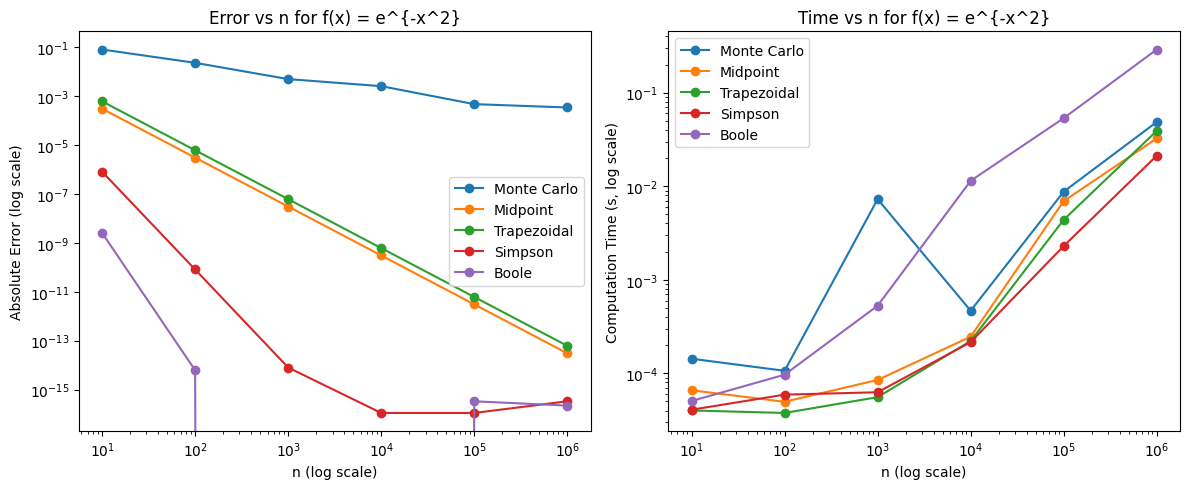

In [ ]:
# plotting

for func_info in functions:
    f = func_info['func']
    a = func_info['a']
    b = func_info['b']
    exact = func_info['exact']
    name = func_info['name']

    print(f"\nIntegrating f(x) = {name} from {a} to {b}")
    print(f"Exact value: {exact}\n")

    # results
    times = { 'Monte Carlo': [], 'Midpoint': [], 'Trapezoidal': [], 'Simpson': [], 'Boole': [] }
    errors = { 'Monte Carlo': [], 'Midpoint': [], 'Trapezoidal': [], 'Simpson': [], 'Boole': [] }

    for n in n_values:
        # Method 1
        start_time = time.time()
        integral_mc = monte_carlo_integration(f, a, b, n)
        time_mc = time.time() - start_time
        error_mc = abs(integral_mc - exact)
        times['Monte Carlo'].append(time_mc)
        errors['Monte Carlo'].append(error_mc)

        # Method 2
        start_time = time.time()
        integral_mid = midpoint_rule(f, a, b, n)
        time_mid = time.time() - start_time
        error_mid = abs(integral_mid - exact)
        times['Midpoint'].append(time_mid)
        errors['Midpoint'].append(error_mid)

        # Method 3
        start_time = time.time()
        integral_trap = trapezoidal_rule(f, a, b, n)
        time_trap = time.time() - start_time
        error_trap = abs(integral_trap - exact)
        times['Trapezoidal'].append(time_trap)
        errors['Trapezoidal'].append(error_trap)

        # Method 4
        start_time = time.time()
        integral_simp = simpsons_rule(f, a, b, n)
        time_simp = time.time() - start_time
        error_simp = abs(integral_simp - exact)
        times['Simpson'].append(time_simp)
        errors['Simpson'].append(error_simp)

        # Method 5
        start_time = time.time()
        integral_boole = boole_rule(f, a, b, n)
        time_boole = time.time() - start_time
        error_boole = abs(integral_boole - exact)
        times['Boole'].append(time_boole)
        errors['Boole'].append(error_boole)

        print(f"n = {n}")
        print(f"  Method 1 (Monte Carlo):          {integral_mc} (Error: {error_mc}, Time: {time_mc:.6f}s)")
        print(f"  Method 2 (Midpoint Rule):        {integral_mid} (Error: {error_mid}, Time: {time_mid:.6f}s)")
        print(f"  Method 3 (Trapezoidal Rule):     {integral_trap} (Error: {error_trap}, Time: {time_trap:.6f}s)")
        print(f"  Method 4 (Simpson's Rule):       {integral_simp} (Error: {error_simp}, Time: {time_simp:.6f}s)")
        print(f"  Method 5 (Boole's Rule):         {integral_boole} (Error: {error_boole}, Time: {time_boole:.6f}s)")
        print()
           # Error vs n
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    for method in errors:
        plt.loglog(n_values, errors[method], marker='o', label=method)
    plt.xlabel('n (log scale)')
    plt.ylabel('Absolute Error (log scale)')
    plt.title(f'Error vs n for f(x) = {name}')
    plt.legend()

    # Time vs n
    plt.subplot(1, 2, 2)
    for method in times:
        plt.loglog(n_values, times[method], marker='o', label=method)
    plt.xlabel('n (log scale)')
    plt.ylabel('Computation Time (s, log scale)')
    plt.title(f'Time vs n for f(x) = {name}')
    plt.legend()


    plt.tight_layout()
    plt.show()

## Conclusions

As we can see from the calculations and plots, when the input size increases, the computational time increases linearly for all methods, except for Boole's Method. Simpson's Method is the quickest in terms of time complexity, and it also converges to the smallest error. As the source from [MIT](http://www.mit.edu/~hlb/StantonGrant/Lecture25/lec25snip2det-1overxsimpsons.pdf) claims, the reason Simpson's Rule is more accurate is that it matches a parabola to the curve, rather than a straight line.

Generally, we can notice the following:

**Monte Carlo Methods** generally show slower convergence of error than other methods; from the graphs, the error decreases at the rate $\frac{1}{\sqrt{n}}$.

**Trapezoidal and Midpoint Methods** are similar, which is why they show similar error decrease rates—approximately $\frac{1}{n^2}$—and they have better accuracy than the Monte Carlo Method.

Next is **Simpson's Rule**, which, as mentioned earlier, shows one of the quickest error convergences and better time complexity.

Although **Boole's Method** has the worst time complexity, it has the best results in error convergence.

When it comes to time complexity, the Monte Carlo Method's time complexity increases linearly, yet it needs large inputs to achieve high precision. Midpoint, Trapezoidal, and Simpson methods also have similar linear time complexity, but Simpson's Method achieves higher precision with fewer inputs. Not surprisingly, Boole's Method—which has high accuracy due to its complex computations—also shows significantly worse time complexity, making the calculations inefficient. So generally, the most balanced method in terms of time complexity and accuracy is Simpson's Method.

Simpson's Rule approximates the integrand using parabolic arcs, which better approximate smooth functions that exhibit matching behavior. It showed good results for the sine function, which might not be intuitive because parabolic arcs do not perfectly match the sinusoidal shape. In turn, the Trapezoidal Method shows good results for the periodic function, probably because it cancels errors over whole intervals, and the left and right sides are symmetrical. Boole's Method shows high accuracy for all the functions because it fits a 4th-degree polynomial, yet it becomes less efficient when $n$ increases, and therefore other methods need to be used. The Monte Carlo Method, which has a slow rate of error decrease, is worse for smooth functions than alternatives; yet, given the nature of the method, it would be better to use it with non-smooth integrals or noisy functions.
